In [63]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [48]:
data = np.loadtxt("data.csv", delimiter=";", dtype=int)
years = data[:, 0]
population = data[:, 1]

In [49]:
degrees = np.arange(0, 7)

In [50]:
def polyfit(m):
    coeffs = np.polyfit(years - 1900, population, m)
    poly = np.poly1d(coeffs)
    return poly
polys = []
for m in range(7):
    poly = polyfit(m)
    polys.append(poly)

In [69]:
true_1990_population = 248_709_873
relative_errors = []
extrapolation_values = []
extrapolation_df = pd.DataFrame()
for i, poly in enumerate(polys):
    extrapolation_value = poly(1990-1900)
    extrapolation_values.append(extrapolation_value)
    relative_error = np.round((np.abs(extrapolation_value - true_1990_population) / true_1990_population)*100, 2)
    relative_errors.append(relative_error)
    print(f"Stopień wielomianu: {i}, wartość ekstrapolowana: {extrapolation_value}, błąd względny: {np.round(relative_error * 100, 2)}%")
extrapolation_df["degree"] = degrees
extrapolation_df["extrapolation value"] = extrapolation_values
extrapolation_df["relative error"] = relative_errors

Stopień wielomianu: 0, wartość ekstrapolowana: 143369177.4444445, błąd względny: 4235.0%
Stopień wielomianu: 1, wartość ekstrapolowana: 235808109.02777773, błąd względny: 519.0%
Stopień wielomianu: 2, wartość ekstrapolowana: 254712944.64285707, błąd względny: 241.0%
Stopień wielomianu: 3, wartość ekstrapolowana: 261439379.5873016, błąd względny: 512.0%
Stopień wielomianu: 4, wartość ekstrapolowana: 243106970.94444418, błąd względny: 225.0%
Stopień wielomianu: 5, wartość ekstrapolowana: 220442802.249999, błąd względny: 1137.0%
Stopień wielomianu: 6, wartość ekstrapolowana: 255044185.44446272, błąd względny: 255.0%


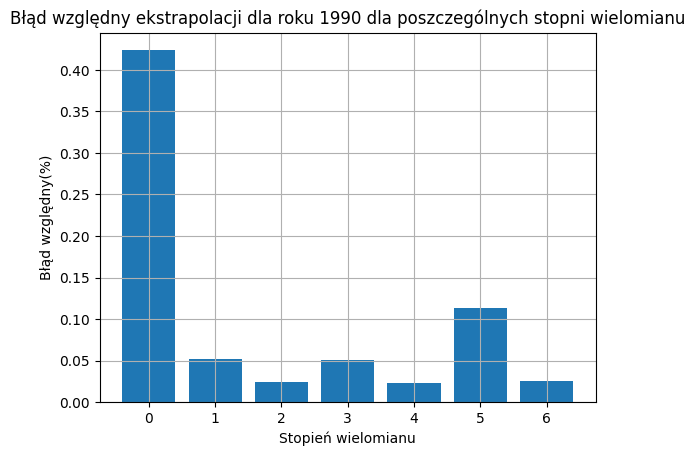

In [60]:
plt.bar(x=degrees,height=relative_errors,tick_label=degrees)
plt.xlabel("Stopień wielomianu")
plt.ylabel("Błąd względny(%)")
plt.title("Błąd względny ekstrapolacji dla roku 1990 dla poszczególnych stopni wielomianu")
plt.grid()
plt.show()

In [72]:
AIC_values = []
AIC_df = pd.DataFrame()

for i, poly in enumerate(polys):
    n = len(population)
    y_hat = poly(years - 1900)
    resid = population - y_hat
    RSS = np.sum(resid ** 2)
    k = i + 1 
    AIC = 2 * k + n * np.log(RSS / n)
    AIC += (2*k*(k+1))/(n-k-1)
    AIC_values.append(AIC)
    print(f'AIC dla stopnia {i}: {AIC:.2f}')
AIC_df['degree'] = degrees
AIC_df['AIC'] = AIC_values

AIC dla stopnia 0: 321.01
AIC dla stopnia 1: 289.06
AIC dla stopnia 2: 279.45
AIC dla stopnia 3: 284.88
AIC dla stopnia 4: 290.93
AIC dla stopnia 5: 311.26
AIC dla stopnia 6: 381.27


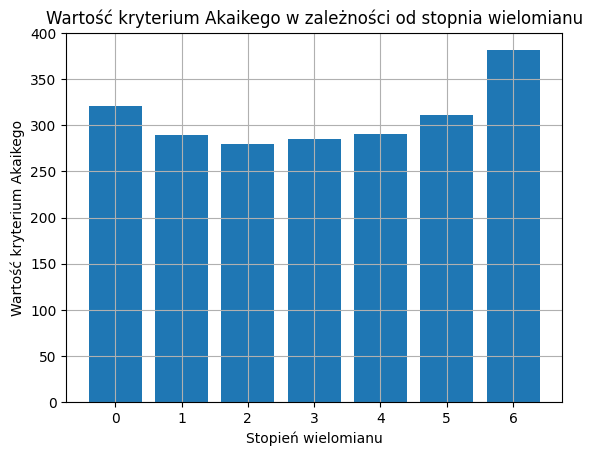

In [62]:
plt.bar(x=degrees, height=AIC_values, tick_label=degrees)
plt.xlabel("Stopień wielomianu")
plt.ylabel("Wartość kryterium Akaikego")
plt.title("Wartość kryterium Akaikego w zależności od stopnia wielomianu")
plt.grid()
plt.show()

In [73]:
AIC_df.to_csv("aic.csv")

In [74]:
extrapolation_df.to_csv("extrapolation.csv")